In [1]:
import pandas as pd

In [2]:
df_before = pd.read_csv("labeled_news_data.csv")
df_after= pd.read_csv("cleaned_news_data.csv")

In [3]:
df_before

,Text,Label
0,Plastic On The Mind: Assessing the Risks From ...,Unlabeled
1,Scenic loch becomes magnet for Scotland's plas...,Unlabeled
2,Trump rolls back standards for water-using app...,Unlabeled
3,Why Aren’t We Losing Our Minds Over the Plasti...,Unlabeled
4,36 Products That’ll Help Get You Through TSA F...,Unlabeled
...,...,...
3443,The new green revolution in crop genetics It i...,Yes
3444,You can't deny it - nuclear weapons are a stup...,Unlabeled
3445,US study shows GM crops 'no better' A two-year...,Unlabeled
3446,Monsanto hints at U-turn on GM food in Britain...,Unlabeled


In [4]:
df_after

,Cleaned_Text,Label
0,plastic mind assessing risks micro nanoplastic...,Unlabeled
1,scenic loch becomes magnet scotlands plastic w...,Unlabeled
2,trump rolls back standards waterusing applianc...,Unlabeled
3,arent losing minds plastic brains brains full ...,Unlabeled
4,products thatll help get tsa faster cadence aa...,Unlabeled
...,...,...
3443,new green revolution crop genetics vision peop...,Yes
3444,cant deny nuclear weapons stupid risk israeli ...,Unlabeled
3445,us study shows gm crops better twoyear study u...,Unlabeled
3446,monsanto hints uturn gm food britain monsanto ...,Unlabeled


In [5]:
print('Missing Values Before Cleaning:\n', df_before.isnull().sum())
print('Missing Values After Cleaning:\n', df_after.isnull().sum())
print('\nDuplicate Records Before Cleaning:', df_before.duplicated().sum())
print('Duplicate Records After Cleaning:', df_after.duplicated().sum())

Missing Values Before Cleaning:
 Text     0
Label    0
dtype: int64
Missing Values After Cleaning:
 Cleaned_Text    0
Label           0
dtype: int64

Duplicate Records Before Cleaning: 0
Duplicate Records After Cleaning: 0


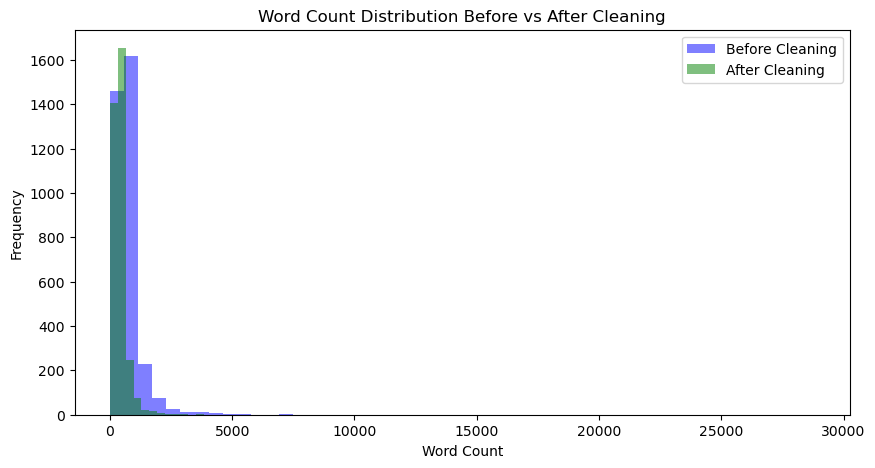

In [6]:
import matplotlib.pyplot as plt

# Add word count columns
df_before['Word_Count'] = df_before['Text'].astype(str).apply(lambda x: len(x.split()))
df_after['Word_Count'] = df_after['Cleaned_Text'].astype(str).apply(lambda x: len(x.split()))

# Plot Word Count Distribution
plt.figure(figsize=(10,5))
plt.hist(df_before['Word_Count'], bins=50, alpha=0.5, label='Before Cleaning', color='blue')
plt.hist(df_after['Word_Count'], bins=50, alpha=0.5, label='After Cleaning', color='green')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('Word Count Distribution Before vs After Cleaning')
plt.show()


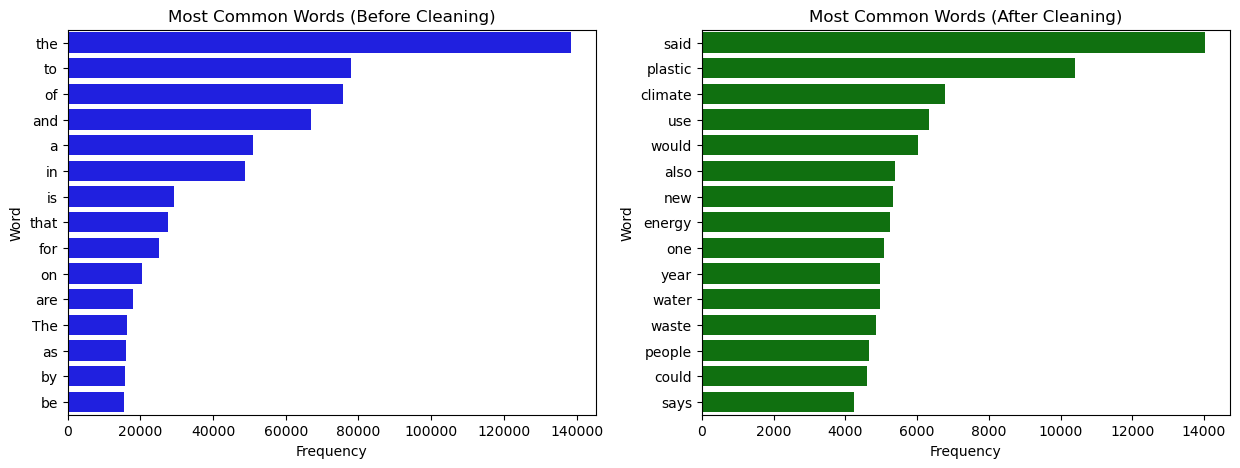

In [7]:
from collections import Counter
import seaborn as sns

# Function to get top words
def get_top_words(text_series, n=15):
    all_words = ' '.join(text_series.astype(str)).split()
    return pd.DataFrame(Counter(all_words).most_common(n), columns=['Word', 'Frequency'])

# Get top words before & after cleaning
top_words_before = get_top_words(df_before['Text'])
top_words_after = get_top_words(df_after['Cleaned_Text'])

# Plot most common words before & after
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Frequency', y='Word', data=top_words_before, ax=axes[0], color='blue')
axes[0].set_title('Most Common Words (Before Cleaning)')

sns.barplot(x='Frequency', y='Word', data=top_words_after, ax=axes[1], color='green')
axes[1].set_title('Most Common Words (After Cleaning)')

plt.show()


In [8]:
!pip install wordcloud

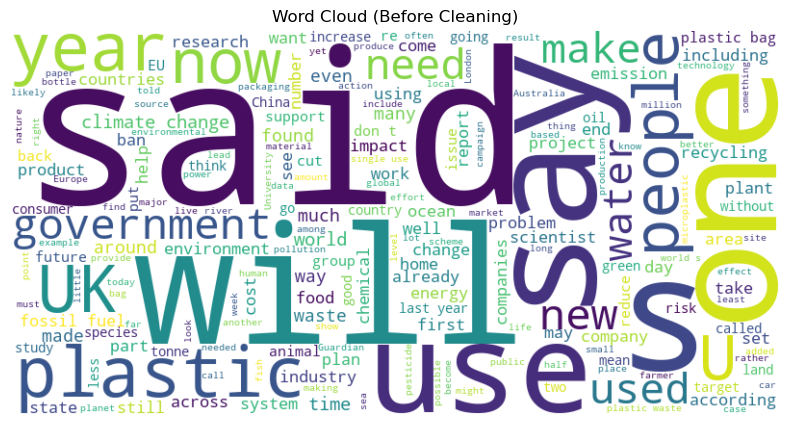

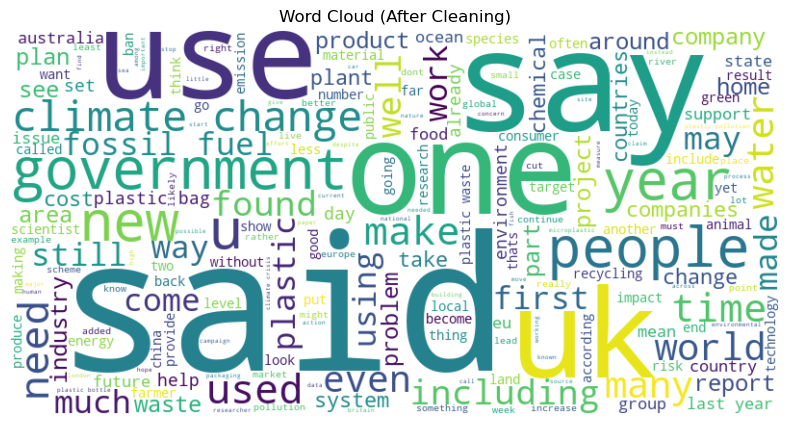

In [9]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text.astype(str)))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word cloud for before & after cleaning
generate_wordcloud(df_before['Text'], 'Word Cloud (Before Cleaning)')
generate_wordcloud(df_after['Cleaned_Text'], 'Word Cloud (After Cleaning)')

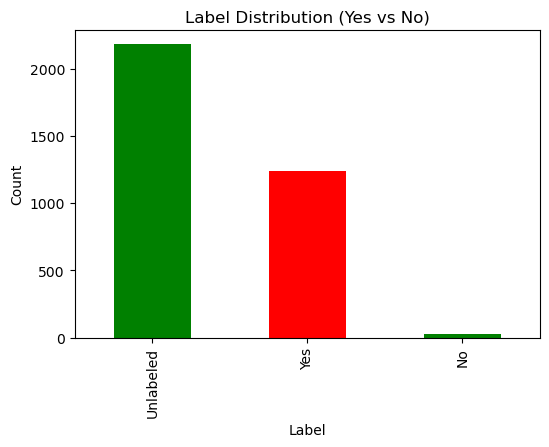

In [10]:
# Label distribution visualization
plt.figure(figsize=(6, 4))
df_after['Label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution (Yes vs No)')
plt.show()
